# Data Cleaning, and Creatign Diversity Index

### Chaithra


We decide to shift to block group data for further analysis as it will help us perform better autocorrelations studies. For this purpose, we downloaded data for two years, 2019 and 2013. There is no 2011 block group level data avaliable for our variables,  hence we shift to 2013, which is still before the projects were competed and hence within the time frame.  
In this note book we will
1. Import 2019 and 2013 data, and narrow it down to relevant variables.
2. Do a data merge of 2013 dataframe and 2019 geodataframe.
4. Create diversity index for each year
5. Check if values are plottable



In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# For plotting
import matplotlib.pyplot as plt

# For basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Import 2019 and 2013 data and narrow it down to relevant variables.

The 2019 data is available at census explorer as a geoJSON format, hence to save considerable time we will use this data. 2013 data is avaiable at csv in census.gov website

### 2019 Data
Importing

In [2]:
b2019 = gpd.read_file("acs2019_5yr_B03002_15000US060014094001.geojson")
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."


The Row 1 is total of rows which we need to remove. Let us drop this row.

In [3]:
b2019=b2019.drop([0])
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,263.0,1139.0,255.0,1008.0,248.0,18.0,27.0,...,12.0,37.0,60.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Now to retain only columns we need, we first check which columns are present, and then retain only the ones we need.

In [4]:
list(b2019)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [5]:
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']
block2019=b2019[columns_to_keep]
block2019.head()

,geoid,name,B03002001,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Perfect! Now we rename all column headers to make them meaningful and also add a suffix to indicate that these are 2019 values.

In [6]:
block2019.columns = ['GEOID',
 'NAME',
 'Total',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']
block2019.head()

,GEOID,NAME,Total,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Now to check the tail, as something unsuable values hang out there. If we find a unrelated row we will drop it.

In [7]:
block2019.tail()

,GEOID,NAME,Total,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1043,15000US060014517043,"Block Group 3, Alameda, CA",807.0,479.0,17.0,10.0,47.0,0.0,0.0,109.0,145.0,"MULTIPOLYGON (((-121.78511 37.66709, -121.7844..."
1044,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
1045,15000US060019820001,"Block Group 1, Alameda, CA",63.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
1046,15000US060019832001,"Block Group 1, Alameda, CA",583.0,308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
1047,15000US060019900000,"Block Group 0, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."


In [8]:
block2019=block2019.drop([1047])

Finally to check the dataframe

In [9]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   GEOID                                                    1046 non-null   object  
 1   NAME                                                     1046 non-null   object  
 2   Total                                                    1046 non-null   float64 
 3   Non Hispanic White                                       1046 non-null   float64 
 4   Non Hispanic Black                                       1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native           1046 non-null   float64 
 6   Non Hispanic Asian                                       1046 non-null   float64 
 7   Non Hispanic Native Hawaiian and Other Pacific Islander  1046 non-null   float64 
 8   Non Hispan

### 2013 data

2013 data unfortunately is not in geojson format. we download the CSV file for census.gov, and will clean it in a manner similar to what we did for the 2019 dataset.

In [10]:
b2013 = gpd.read_file("ACSDT5Y2013.B03002_data_with_overlays_2022-02-21T160847.csv")
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Not Hispanic or Latino,Margin of Error!!Total!!Not Hispanic or Latino,Estimate!!Total!!Not Hispanic or Latino!!White...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Black...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Ameri...,Margin of Error!!Total!!Not Hispanic or Latino...,...,Margin of Error!!Total!!Hispanic or Latino!!So...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,id,Geographic Area Name,None
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None


The county total with total of rows is not the first row. But first row is text that needs to be removed too. Let us check if see if it is present in the end. If so, it must be removed. 

In [11]:
b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None


Yes, let us drop row 0 and 1047

In [12]:
b2013=b2013.drop([0,1047])

b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1042,1740,308,1458,276,1379,271,0,12,0,12,...,49,30,51,30,51,0,12,1500000US060014517042,"Block Group 2, Census Tract 4517.04, Alameda C...",None
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None


In [13]:
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,938,208,840,209,594,140,74,74,15,24,...,13,17,27,17,27,0,12,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


Now to retain necessary columns, and rename them with a suffix to indicate the year.

In [14]:
list(b2013)

['B03002_001E',
 'B03002_001M',
 'B03002_002E',
 'B03002_002M',
 'B03002_003E',
 'B03002_003M',
 'B03002_004E',
 'B03002_004M',
 'B03002_005E',
 'B03002_005M',
 'B03002_006E',
 'B03002_006M',
 'B03002_007E',
 'B03002_007M',
 'B03002_008E',
 'B03002_008M',
 'B03002_009E',
 'B03002_009M',
 'B03002_010E',
 'B03002_010M',
 'B03002_011E',
 'B03002_011M',
 'B03002_012E',
 'B03002_012M',
 'B03002_013E',
 'B03002_013M',
 'B03002_014E',
 'B03002_014M',
 'B03002_015E',
 'B03002_015M',
 'B03002_016E',
 'B03002_016M',
 'B03002_017E',
 'B03002_017M',
 'B03002_018E',
 'B03002_018M',
 'B03002_019E',
 'B03002_019M',
 'B03002_020E',
 'B03002_020M',
 'B03002_021E',
 'B03002_021M',
 'GEO_ID',
 'NAME',
 'geometry']

In [15]:
columns_to_keep2= ['B03002_001E',
                   'B03002_002E',
                   'B03002_003E',
                   'B03002_004E',
                   'B03002_005E',
                   'B03002_006E',
                   'B03002_007E',
                   'B03002_008E',
                   'B03002_009E',
                   'B03002_012E',
                   'GEO_ID',
                   'NAME']
block2013=b2013[columns_to_keep2]
block2013.columns = [
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'GEOID',
 'NAME']
block2013.head()

,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


Perfect! 
## Merging 2019 and 2013 files

We will use a pandas merge as one of our files is a csv and other a geodata. Keeping the geodataframe to the right must ensure that new frame created is also geodataframe. Since this is a pandas merge, we need to define a common merge metrics, for which we will create a common geoid. Currently, these do not match. 

In [16]:
block2013['new_GEOID']=block2013['GEOID'].str[-14:]
block2013['new_GEOID']

/tmp/ipykernel_1016/527370562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block2013['new_GEOID']=block2013['GEOID'].str[-14:]


1       US060014001001
2       US060014002001
3       US060014002002
4       US060014003001
5       US060014003002
             ...      
1042    US060014517042
1043    US060014517043
1044    US060019819001
1045    US060019820001
1046    US060019832001
Name: new_GEOID, Length: 1046, dtype: object

In [17]:
block2019['new_GEOID']=block2019['GEOID'].str[-14:]
block2019['new_GEOID']

1       US060014001001
2       US060014002001
3       US060014002002
4       US060014003001
5       US060014003002
             ...      
1042    US060014517042
1043    US060014517043
1044    US060019819001
1045    US060019820001
1046    US060019832001
Name: new_GEOID, Length: 1046, dtype: object

In [18]:
block_2019_2013= block2019.merge(block2013, how='inner', left_on='new_GEOID', right_on='new_GEOID',suffixes=('_2019', '_2013'))

block_2019_2013

type(block_2019_2013)

geopandas.geodataframe.GeoDataFrame

In [19]:
block_2019_2013.head()

,GEOID_2019,NAME_2019,Total_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,...,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID_2013,NAME_2013
0,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,...,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
1,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,...,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
2,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,...,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
3,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,...,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
4,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,...,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


Let us check if the file can be mapped.

<AxesSubplot:>

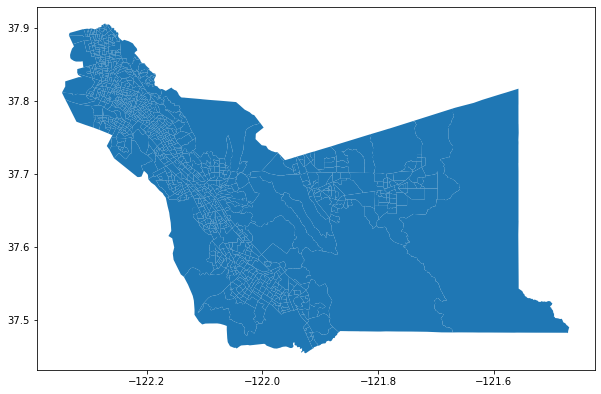

In [20]:
block_2019_2013.plot(figsize=(10,10))

Both the tracts have numbers. Now to add the percentages of different ethnicities: 
Adding percentages for 2019

## Creating Index

### Index of qualitative variation

IQV measures diversity in within a group. It is calculated in the following manner:
IQV = (K^2)*(100^2-\Sigma(pct^2))/(100^2)*(K-1)

1. First we need to generate percentages each ethnic group with respect to the total of each year. 
2. Then create percentage squares for each ethnic group, each year

#### Creating percentage for each ethnic group
We will first check if all values are float so that we are able to make percentages out of all values. 

In [21]:
block_2019_2013.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 25 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID_2019                                                    1046 non-null   object  
 1   NAME_2019                                                     1046 non-null   object  
 2   Total_2019                                                    1046 non-null   float64 
 3   Non Hispanic White_2019                                       1046 non-null   float64 
 4   Non Hispanic Black_2019                                       1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019           1046 non-null   float64 
 6   Non Hispanic Asian_2019                                       1046 non-null   float64 
 7   Non Hispanic Native Hawaiian and Other Pacific Islan

2013 values are object and need conversion let us do it.

In [22]:

dtypes2013 = ['Total_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']

dtypes2019 = ['Total_2019', 
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']

In [23]:
for i in dtypes2013:
    block_2019_2013[i]=block_2019_2013[i].astype(float)

In [24]:
block_2019_2013.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 25 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID_2019                                                    1046 non-null   object  
 1   NAME_2019                                                     1046 non-null   object  
 2   Total_2019                                                    1046 non-null   float64 
 3   Non Hispanic White_2019                                       1046 non-null   float64 
 4   Non Hispanic Black_2019                                       1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019           1046 non-null   float64 
 6   Non Hispanic Asian_2019                                       1046 non-null   float64 
 7   Non Hispanic Native Hawaiian and Other Pacific Islan

Successful! Now we add percentage of each ethnic group for each year. 

In [25]:
def createpercentage(block, dtype, year):
    for x in dtype:
        block[("Percent " + x)] = block[x]/block["Total_"+ year]*100
        print(x, "Completed")

In [26]:
createpercentage(block_2019_2013, dtypes2019, "2019")

Total_2019 Completed
Non Hispanic White_2019 Completed
Non Hispanic Black_2019 Completed
Non Hispanic American Indian and Alaska Native_2019 Completed
Non Hispanic Asian_2019 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2019 Completed
Non Hispanic Some other race_2019 Completed
Non Hispanic Two or more races_2019 Completed
Hispanic_2019 Completed


In [27]:
createpercentage(block_2019_2013, dtypes2013, "2013")

Total_2013 Completed
Non Hispanic White_2013 Completed
Non Hispanic Black_2013 Completed
Non Hispanic American Indian and Alaska Native_2013 Completed
Non Hispanic Asian_2013 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2013 Completed
Non Hispanic Some other race_2013 Completed
Non Hispanic Two or more races_2013 Completed
Hispanic_2013 Completed


In [28]:
block_2019_2013.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 43 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_2019                                                            1046 non-null   object  
 1   NAME_2019                                                             1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic White_2019                                               1046 non-null   float64 
 4   Non Hispanic Black_2019                                               1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019                   1046 non-null   float64 
 6   Non Hispanic Asian_2019                                               1046 non-n

In [29]:
block_2019_2013.to_file("block_2019_2013V2.geojson", driver='GeoJSON')

### Creating index: Percentage squares for each ethnic group, each year and compute index

In [30]:
ball=block_2019_2013

col2019=[
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019']

col2013=[
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013']
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 43 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_2019                                                            1046 non-null   object  
 1   NAME_2019                                                             1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic White_2019                                               1046 non-null   float64 
 4   Non Hispanic Black_2019                                               1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019                   1046 non-null   float64 
 6   Non Hispanic Asian_2019                                               1046 non-n

In [31]:
perc_2019_sq=0
for k in col2019: 
    perc_2019_sq+= ball[k]**2 
    
K=len(col2019)
ball['perc_2019_sq']=perc_2019_sq

ball['iqv_2019']= (100**2 -ball['perc_2019_sq'])*K / (100**2*(K-1))

perc_2013_sq=0
for k in col2013: 
    perc_2013_sq+= ball[k]**2 
ball['perc_2013_sq']=perc_2013_sq
ball['iqv_2013']= (100**2 -ball['perc_2013_sq'])*K / (100**2*(K-1))

ball[['perc_2013_sq', 'iqv_2013', 'perc_2019_sq','iqv_2019']].head(20)



,perc_2013_sq,iqv_2013,perc_2019_sq,iqv_2019
0,4553.276735,0.622483,5734.007232,0.487542
1,5327.561406,0.533993,6079.257219,0.448085
2,5153.442606,0.553892,5196.197581,0.549006
3,4381.674737,0.642094,4847.957473,0.588805
4,4340.201217,0.646834,6788.537737,0.367024
5,3916.788903,0.695224,4265.135266,0.655413
6,5955.552140,0.462223,4912.338251,0.581447
7,4830.763273,0.590770,5154.516131,0.553770
8,3503.901270,0.742411,3581.314879,0.733564
9,4815.388382,0.592527,4228.815876,0.659564


The index has been created. Let us check the dataframe once and plot the index

In [32]:
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 47 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_2019                                                            1046 non-null   object  
 1   NAME_2019                                                             1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic White_2019                                               1046 non-null   float64 
 4   Non Hispanic Black_2019                                               1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019                   1046 non-null   float64 
 6   Non Hispanic Asian_2019                                               1046 non-n

Plotting 2013 index

<AxesSubplot:>

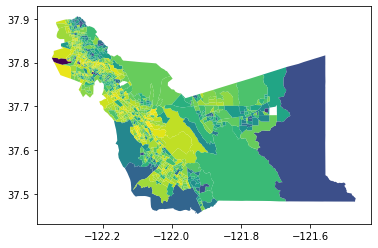

In [33]:
ball.plot(column='iqv_2013')

Plotting 2019 Index

<AxesSubplot:>

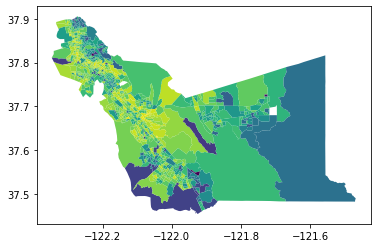

In [34]:
ball.plot(column='iqv_2019')

In [35]:
ball.to_file('ethnicityindex.geojson', driver='GeoJSON')

Descriptive statistics to understand how the index varies.
Histograms

In [36]:
def create_hist(col, col2):
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(ball[col], bins = [ 0, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.set_xlabel(col)
    ax.set_ylabel("No. of Census Tracts")
    ax.set_title(r'Histogram')
    plt.show()

In [37]:
cols=['iqv_2019', 'iqv_2013']


iqv_2019 Diversity Index


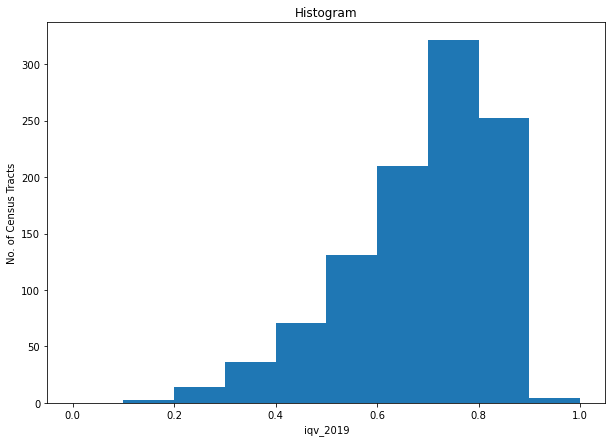


iqv_2013 Diversity Index


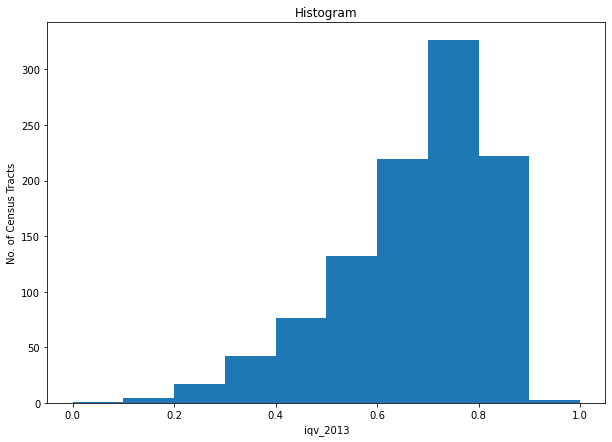

In [38]:
for i in cols:
    x="\n"+i+" Diversity Index"
    print(x)
    create_hist(i,x)

From the histogram, it seems like diversity decreased, particuarly the number of blockgroups with iqv>0.8.

Let us check descriptive statistics for a clearer picture


In [39]:
for i in cols:
    print( '\033[1m', "Summary Diversity index", i, '\033[0m')
    print(ball[i].describe(), "\n")

 Summary Diversity index iqv_2019 
count    1042.000000
mean        0.688290
std         0.143141
min         0.132691
25%         0.604092
50%         0.723582
75%         0.797632
max         0.930844
Name: iqv_2019, dtype: float64 

 Summary Diversity index iqv_2013 
count    1042.000000
mean        0.676179
std         0.149944
min         0.000000
25%         0.592948
50%         0.708352
75%         0.792854
max         0.909359
Name: iqv_2013, dtype: float64 



Average diversity in blockgroups in the county has increased. However there is a reduction in extremely diverse blockgroup indexes. 

Now let us plot the diversity with station on it.

In [40]:
stations=gpd.read_file("stations.geojson")
tod=stations[stations['TOD']=='Yes']
ntod=stations[stations['TOD']=='No']

In [41]:
# reproject to Web Mercator
ball_webmer = ball.to_crs(epsg=3857)

stations_webmer = stations.to_crs(epsg=3857)
tod_wm=tod.to_crs(epsg=3857)
ntod_wm=ntod.to_crs(epsg=3857)

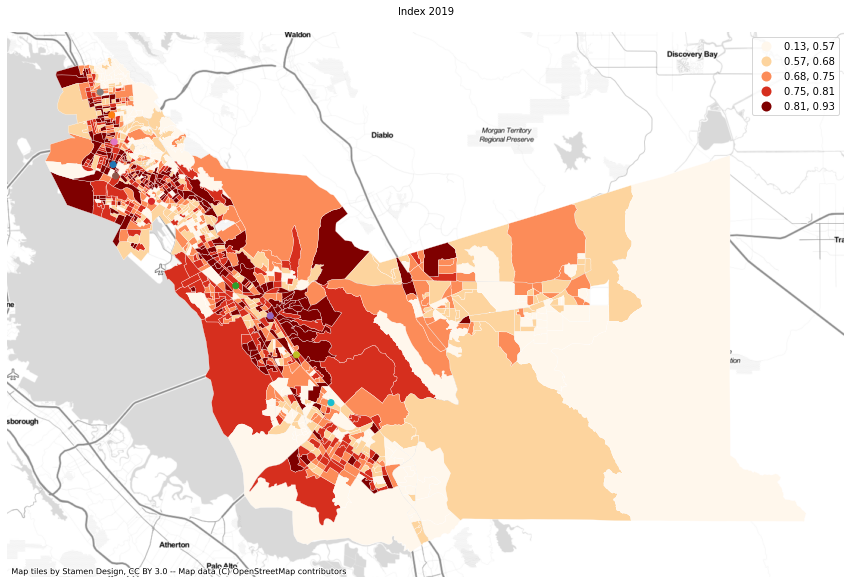

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2019'],
                        cmap='OrRd', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('Index 2019',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

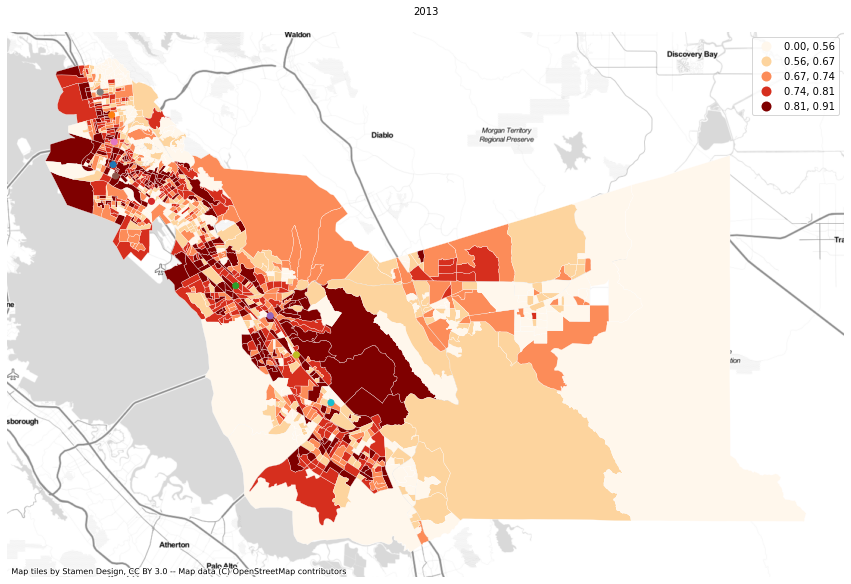

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2013'],
                        cmap='OrRd', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('2013',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In both years, higly diverse blockgroups are concetrated close to the BART line. We will create better maps in another notebook.